# mnist beginner tutorial

In [1]:
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
import numpy
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Initializing tf variables:

In [2]:
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()

### Running the model:

In [3]:
sess = tf.Session()
sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

### Evaluating the model:

In [4]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print sess.run(accuracy, 
               feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9075


## Sample images:

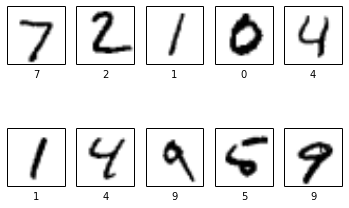

In [5]:
for i in range(10):
    img, label = mnist.test.images[i], mnist.test.labels[i]
    img = img.reshape(28, 28)
    curr = plt.subplot(2,5,i+1)
    curr.imshow(img, cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(numpy.argmax(label))

## Our Images:

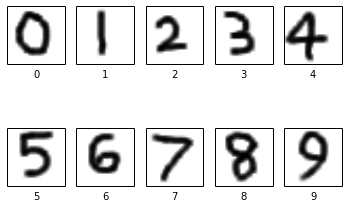

In [6]:
images = [
    (255 - numpy.asarray(Image.open("%d.png" % i))) / 255.0 
    for i in range(10)]
for i in range(10):
    curr = plt.subplot(2,5,i+1)
    curr.imshow(images[i], cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(i)





In [7]:
def classify(image):
    image = tf.to_float(tf.convert_to_tensor(image.reshape(1, 784)))
    result = sess.run(tf.nn.softmax(tf.matmul(image, W) + b))
    return numpy.argmax(result)

## Classifications of sample images using our model:

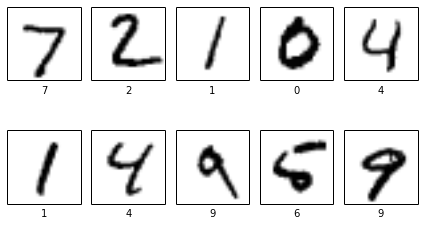

In [8]:
for i in range(10):
    image = mnist.test.images[i].reshape(28, 28)
    curr = plt.subplot(2,5,i+1)
    curr.imshow(image, cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(classify(image))
plt.tight_layout()

## Classifications of our images using our model:

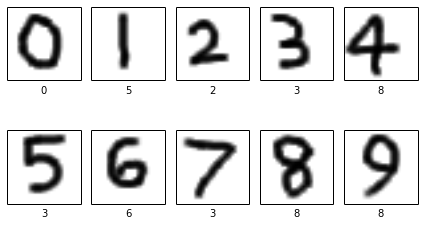

In [9]:
for i in range(10):
    image = images[i]
    curr = plt.subplot(2,5,i+1)
    curr.imshow(image, cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(classify(image))
plt.tight_layout()

## Clearly, the model is nowhere near 90% accurate when running on our data.
### One possible cause for this could be differences in the formats of the images. This might be alleviated by normalizing all the images. The easiest way to do that would be to convert pixels from floats to binary


In [38]:
def normalize(image):
    return (2 * (image - .00001)).astype(int)
print normalize(images[0])
print normalize(mnist.test.images[3].reshape(28,28))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 

In [39]:
normalized_sess = tf.Session()
normalized_sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xs = normalize(batch_xs)
    normalized_sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [40]:
print normalized_sess.run(accuracy, 
               feed_dict={x: normalize(mnist.test.images), y_: mnist.test.labels})
print normalized_sess.run(accuracy, 
               feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9141
0.9201


### Unfortunately, it seems that even a model trained with normalized data performs just as well when given non-normalized inputs...

In [41]:
def classify_normalized(image):
    image = tf.to_float(tf.convert_to_tensor(image.reshape(1, 784)))
    result = normalized_sess.run(tf.nn.softmax(tf.matmul(image, W) + b))
    return numpy.argmax(result)

## Normalized model on sample data:

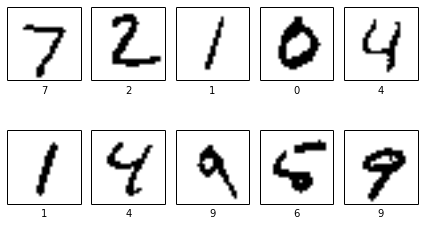

In [42]:
for i in range(10):
    image = mnist.test.images[i].reshape(28, 28)
    image = normalize(image)
    curr = plt.subplot(2,5,i+1)
    curr.imshow(image, cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(classify_normalized(image))
plt.tight_layout()

## Normalized model on my data:

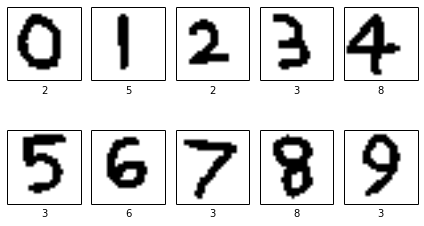

In [43]:
for i in range(10):
    image = images[i]
    image = normalize(image)
    curr = plt.subplot(2,5,i+1)
    curr.imshow(image, cmap=plt.cm.binary)
    curr.set_xticks([])
    curr.set_yticks([])
    plt.xlabel(classify_normalized(image))
plt.tight_layout()

### I really have no idea why the model isn't working on my data anymore...